

# DH. Дневники.


Проанализировать файлы с дневниками.

In [2]:
import pandas as pd
from pathlib import Path
!pip install sweetviz
import sweetviz as sv
import csv

In [3]:
data4 = ""
with open('/content/whole_table.csv', newline='', encoding="utf-8") as file:
  data4 = file.read().replace(",#", "\t")
with open('/content/whole_table8.csv', "w", encoding="utf-8") as file:
  file.write(data4)

In [4]:
whole = pd.read_csv(Path('/content/whole_table8.csv'), sep='\t')

In [5]:
#whole = pd.DataFrame()
whole.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384526 entries, 0 to 384525
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  384526 non-null  int64 
 1   notes       384525 non-null  object
 2   dates       384526 non-null  object
 3   id          384526 non-null  int64 
 4   author      384526 non-null  object
dtypes: int64(2), object(3)
memory usage: 14.7+ MB


In [6]:
data4 = ""
with open('/content/whole_table_with_lemm.csv', newline='', encoding="utf-8") as file:
  data4 = file.read().replace(",#", "\t")
with open('/content/whole_table_with_lemm8.csv', "w", encoding="utf-8") as file:
  file.write(data4)

In [7]:
lemm = pd.read_csv(Path('/content/whole_table_with_lemm8.csv'), sep='\t')

In [8]:
lemm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384526 entries, 0 to 384525
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  384526 non-null  int64 
 1   notes       384525 non-null  object
 2   notes
      384525 non-null  object
 3   dates       384526 non-null  object
 4   id          384526 non-null  int64 
 5   author      384526 non-null  object
dtypes: int64(2), object(4)
memory usage: 17.6+ MB


In [9]:
whole.head()

,Unnamed: 0,notes,dates,id,author
0,0,Воскресенье. \nВчера приехал Слава навестит...,0/0/0,2950,Василий Сергеевич Савельев
1,1,"Ночью мы достигли банки Антон-Дорн, в Датском ...",0/0/0,2268,Олег Владимирович Амитров
2,2,Суббота. Москва. Еду в Селище.,0/12/21,795,Сергей Иванович Танеев
3,3,18 Августа Его Королевское Величество отправил...,1609/8/18,1081,Самуил Бельский
4,4,"На следующий день, 19 Августа, прибыл в Остров...",1609/8/19,1081,Самуил Бельский


In [10]:
lemm.head()

,Unnamed: 0,notes,notes\n,dates,id,author
0,0,Воскресенье. \nВчера приехал Слава навестит...,воскресение. \nвчера приезжать слава навеща...,0/0/0,2950,Василий Сергеевич Савельев
1,1,"Ночью мы достигли банки Антон-Дорн, в Датском ...","ночь мы достигать банка антон-дорн, в датский ...",0/0/0,2268,Олег Владимирович Амитров
2,2,Суббота. Москва. Еду в Селище.,суббота. москва. ехать в селище.\n,0/12/21,795,Сергей Иванович Танеев
3,3,18 Августа Его Королевское Величество отправил...,18 август его королевский величество отправлят...,1609/8/18,1081,Самуил Бельский
4,4,"На следующий день, 19 Августа, прибыл в Остров...","на следующий день, 19 август, прибывать в остр...",1609/8/19,1081,Самуил Бельский


In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
#if whole['dates']!='0/0/0':
#  whole['dates'] = pd.to_datetime(whole['dates'], format="%Y-%m-%d").dt.year
#if lemm['dates']!='0/0/0':  
#  lemm['dates'] = pd.to_datetime(lemm['dates'], format="%Y-%m-%d").dt.month

In [13]:
f_whole = sv.FeatureConfig(skip=["id"] )

In [14]:
whole_report = sv.analyze(whole)

                                             |          | [  0%]   00:00 -> (? left)

In [15]:
whole_report.show_html(Path('/content/whole.html')) 

Report /content/whole.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [16]:
lemm_report = sv.analyze(lemm)

                                             |          | [  0%]   00:00 -> (? left)

In [17]:
lemm_report.show_html(Path('/content/lemm.html')) 

Report /content/lemm.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [18]:
whole['year'] = whole['dates']

In [19]:
whole.head()

,Unnamed: 0,notes,dates,id,author,year
0,0,Воскресенье. \nВчера приехал Слава навестит...,0/0/0,2950,Василий Сергеевич Савельев,0/0/0
1,1,"Ночью мы достигли банки Антон-Дорн, в Датском ...",0/0/0,2268,Олег Владимирович Амитров,0/0/0
2,2,Суббота. Москва. Еду в Селище.,0/12/21,795,Сергей Иванович Танеев,0/12/21
3,3,18 Августа Его Королевское Величество отправил...,1609/8/18,1081,Самуил Бельский,1609/8/18
4,4,"На следующий день, 19 Августа, прибыл в Остров...",1609/8/19,1081,Самуил Бельский,1609/8/19


In [22]:
#whole_report = sv.analyze(whole, target_feat='id', feat_cfg=f_whole)

In [23]:
#whole_report.show_html(Path('/content/whole_id.html')) 

In [24]:
f_whole2 = sv.FeatureConfig(skip=["dates"] )

In [25]:
whole_report2 = sv.analyze(whole, feat_cfg=f_whole2)

                                             |          | [  0%]   00:00 -> (? left)

In [26]:
whole_report2.show_html(Path('/content/whole_dates2.html')) 

Report /content/whole_dates2.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Text(0.5, 1.0, 'Missing  values  heatmap')

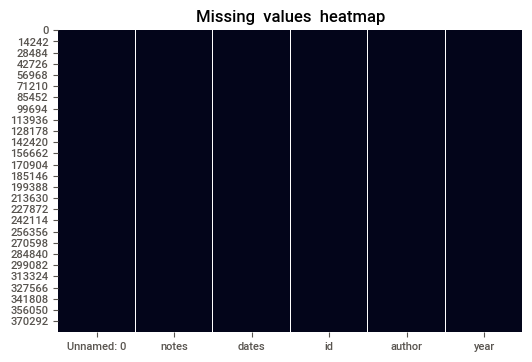

In [27]:
import seaborn as sns
sns.heatmap(whole.isnull(), cbar = False).set_title("Missing  values  heatmap")

In [28]:
whole.nunique()#количество уникальных значений

Unnamed: 0    384526
notes         383590
dates          68846
id              1516
author          1498
year           68846
dtype: int64

In [29]:
whole.describe()

,Unnamed: 0,id
count,384526.000000,384526.000000
mean,192262.500000,730.584158
std,111003.239142,669.928649
min,0.000000,3.000000
25%,96131.250000,196.000000
50%,192262.500000,519.000000
75%,288393.750000,991.000000
max,384525.000000,3505.000000


In [30]:
whole_year = whole.groupby('year').sum()
whole_year.head(10)

,Unnamed: 0,id
year,,
0/0/0,1,5218
0/12/21,2,795
1609/10/1,46,1081
1609/10/10,55,1081
1609/10/11,56,1081
1609/10/12,57,1081
1609/10/13,58,1081
1609/10/14,59,1081
1609/10/15,60,1081


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6b0d66470>,
      dtype=object)

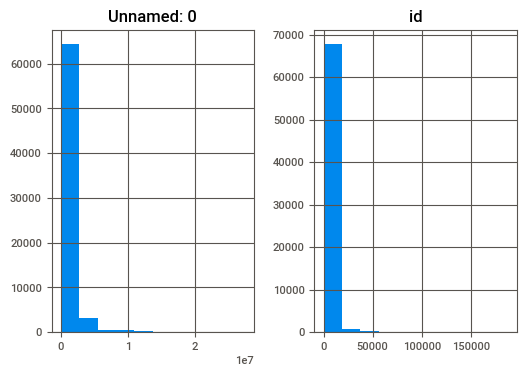

In [31]:
whole_year.hist()

In [32]:
whole_author = whole.groupby('author').sum()
whole_author.head(20)

,Unnamed: 0,id
author,,
Штукатуров,10752387,36828
Аноним,7725413,18330
Аноним,121495837,118638
Света,1874806,2674
Аноним,5764746,8632
Аноним,313350,524
Аноним,300389722,3817130
Анонимы,1146027,22858
Васёна,22240037,95832


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6b0c5a1d0>,
      dtype=object)

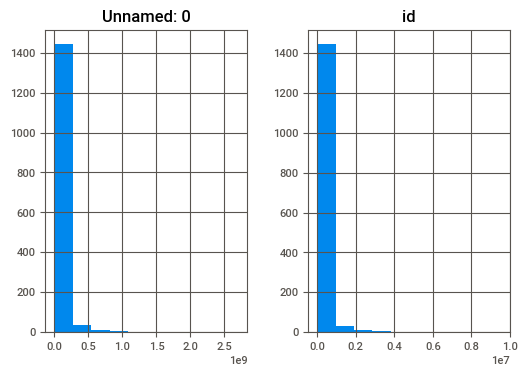

In [33]:
whole_author.hist()

In [34]:
whole_notes = whole.groupby('notes').sum()
whole_notes.head(5)

Unnamed: 0    id
notes                                                               
\n\n|  |   |\n| -------- | -------- |\n| 10 до ...       14297   196
\n\n|  |   |\n| -------- | -------- | -------- ...       14299   196
\n![](https://i.imgur.com/86bPWbr.png)\n\nИногд...      227746  1433
\n![](https://i.imgur.com/EQF6SMl.png)\n\nКотя,...      253318  1433
\n![](https://i.imgur.com/MTqxylq.png?1)\n\nВ 1...      227781  1433

In [35]:
feature_config_comp = sv.FeatureConfig(skip=["notes", "id",
                                             "dates", 
                                             ] )

In [ ]:
#comp_report = sv.compare([whole, "whole"], [lemm, "lemm"], "author", feature_config_comp)

In [ ]:
comp_report.show_html(Path('../visuals/compare.html')) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6b0b6deb8>,
      dtype=object)

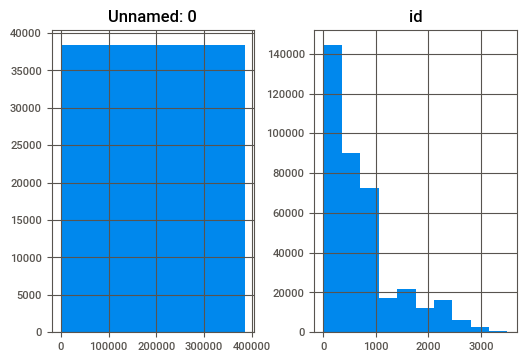

In [36]:
whole.hist(bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6b0c32fd0>,
      dtype=object)

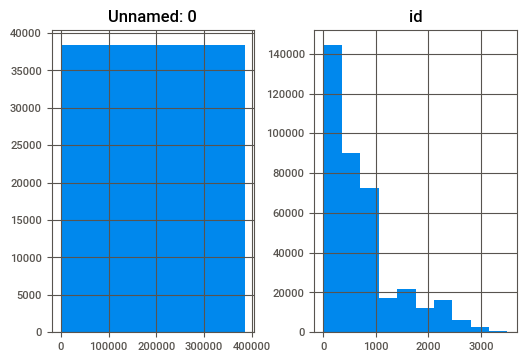

In [37]:
lemm.hist(bins=10)